In [16]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf
yf.pdr_override()

In [18]:
symbols = 'AMD'
start = '2021-08-20'
end = '2022-08-20'
dataset = yf.download(symbols,start,end)
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-20,104.320000,105.980003,103.989998,104.650002,104.650002,55227600
2021-08-23,105.300003,109.019997,104.860001,108.769997,108.769997,68835300
2021-08-24,109.449997,109.610001,107.279999,107.650002,107.650002,51239300
2021-08-25,108.129997,109.910004,107.449997,108.300003,108.300003,45485500
2021-08-26,108.570000,109.230003,106.839996,107.269997,107.269997,51442500


In [19]:
dataset['Returns'] = np.log(dataset['Adj Close'] / dataset['Adj Close'].shift(1))
dataset = dataset.dropna()

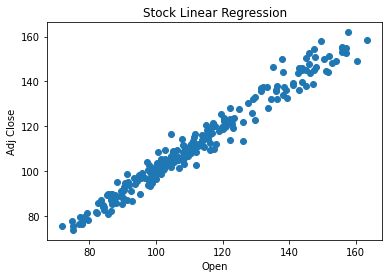

In [20]:
X = dataset['Open']
Y = dataset['Adj Close']
plt.scatter(X,Y)
plt.xlabel('Open')
plt.ylabel('Adj Close')
plt.title('Stock Linear Regression')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)


In [23]:
X_train = np.array(X_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [24]:
X_train.shape

(200, 1)

In [25]:
from sklearn.linear_model import LinearRegression
linregression=LinearRegression()
linregression.fit(X_train,y_train)

LinearRegression()

In [26]:
y_pred = linregression.predict(X_test)
y_pred

array([[116.17474727],
       [117.03767996],
       [144.4454439 ],
       [104.02511523],
       [119.71471347],
       [ 95.57234897],
       [122.77418782],
       [135.4533447 ],
       [154.85940994],
       [111.24233102],
       [109.95774756],
       [ 87.01170863],
       [114.44889685],
       [ 96.93538222],
       [123.28409647],
       [140.52304434],
       [ 87.83541643],
       [ 91.61072451],
       [ 94.63096649],
       [135.75732827],
       [104.54483198],
       [122.72515484],
       [ 95.11146582],
       [107.95732289],
       [104.3389069 ],
       [146.70082664],
       [110.30095602],
       [153.14336014],
       [ 99.39668255],
       [110.4774643 ],
       [102.56402349],
       [144.46506009],
       [101.70109828],
       [ 89.9829251 ],
       [ 82.71668381],
       [108.42801412],
       [ 98.0630661 ],
       [112.54653067],
       [104.97629832],
       [115.15492249],
       [129.20692819],
       [106.61389834],
       [114.00762241],
       [ 87

In [27]:
print('Intercept')
linregression.intercept_

Intercept


array([2.12117645])

In [28]:
print('Slope')
linregression.coef_

Slope


array([[0.98059989]])

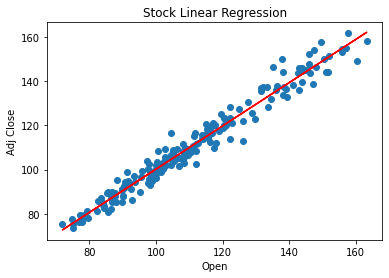

In [29]:
import matplotlib.pyplot as plt
plt.scatter(X_train,y_train)
plt.plot(X_train,linregression.predict(X_train),'r')
plt.xlabel('Open')
plt.ylabel('Adj Close')
plt.title('Stock Linear Regression')
plt.show()